# Explanation file 

In [1]:
import Functions as fn
import numpy as np
import CRUMPET
import matplotlib.pyplot as plt
import fc_mapping as fc
import scipy.interpolate as interpolate
import scipy.integrate as integrate

In [2]:
# Start by generating an input file
fn.gen_input('input_fin.dat', vibr_lap = True, ion = True, B1=True, C1=True, EF1=True, incl_ground=False,a3=True,c3=True,d3=True,
             diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, inter_states=True, coll_deex=True, MA=True, MA_min=True)

In [3]:
# Create CRM
crm = CRUMPET.Crumpet('input_fin.dat')

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 106/106 [00:02<00:00, 43.71it/s]


Constructing functional emissivity matrix


100%|██████████| 106/106 [00:01<00:00, 58.88it/s]


Constructing functional energy transfer matrix


100%|██████████| 106/106 [00:01<00:00, 59.95it/s]


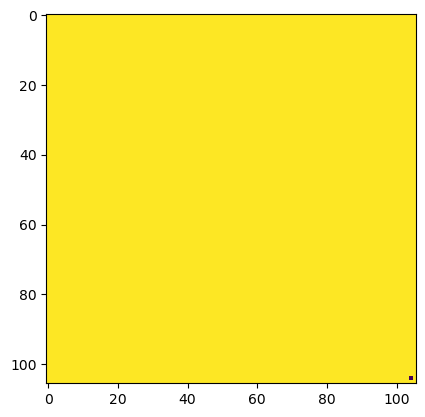

In [4]:
# You can use CRUMPET functions to get matrix etc. 
plt.imshow(crm.getM(1,1e19,Ti=0.5)[0])

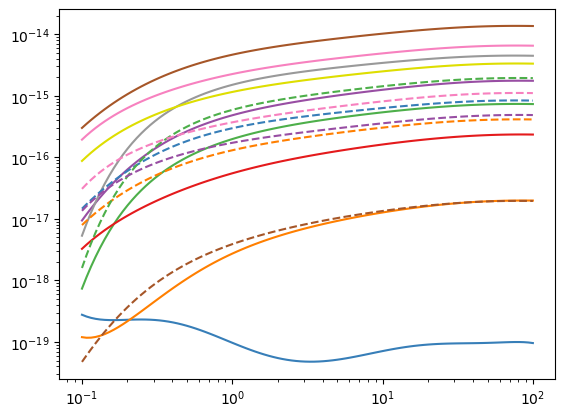

In [5]:
# You can also get vibrationally resolved rates from the CRM and evalulate them using eval_1D and eval_2D
Tev = 10**np.linspace(-1,2,100)

for i in range(15):
    coeffs = crm.reactions['H2VIBR']['H.2']['1.'+str(i)+'d14'].coeffs
    plt.loglog(Tev,fn.eval_1D(coeffs,Tev))


In [6]:
# You can use vibr_dist to get a vibrational distribution as a function of temperature and density
ne=1e19
fv_H2 = fn.vibr_dist(crm,Tev,ne).reshape(len(crm.species)+1,len(Tev))

In [12]:
# Initializing the indices for different species
indx_X1 = np.append(0,np.arange(1,15))
indx_B1 = np.append(15,np.arange(16,30))
indx_C1 = np.append(30,np.arange(31,45))
indx_EF1 = np.append(45,np.arange(46,60))
indx_a3 = np.append(60,np.arange(61,75))
indx_c3 = np.append(75,np.arange(76,90))
indx_d3 = np.append(90,np.arange(91,105))
indx_mol = np.arange(0,105)
indx_H2Plus = len(crm.species)-1
indx_Hmin = len(crm.species)

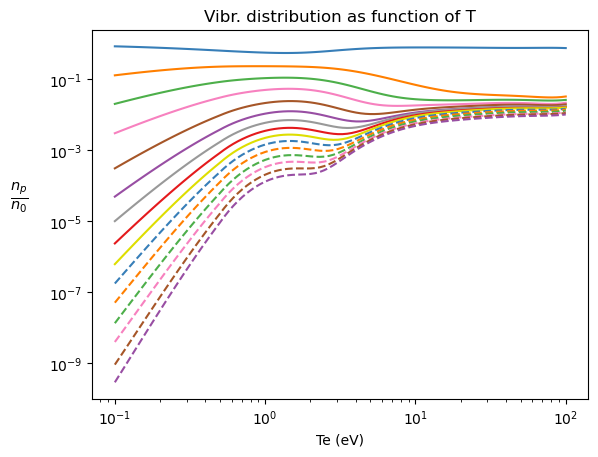

In [13]:
# Plot the vibrational distribution
plt.loglog(Tev, np.transpose(fv_H2[indx_X1]))
# plt.ylim(1e-3,1e-1)
plt.xlabel('Te (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.title('Vibr. distribution as function of T')
plt.show()


In [14]:
Xeff = fn.get_Xeff(crm,fv_H2,'d3Pu','a3Sg',ne)

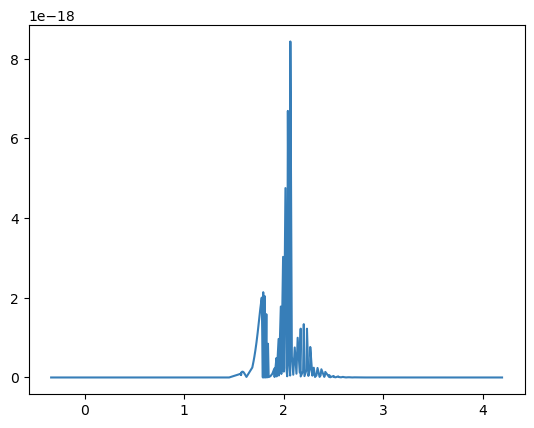

In [15]:
plt.plot(Xeff[50][:,0], Xeff[50][:,1])

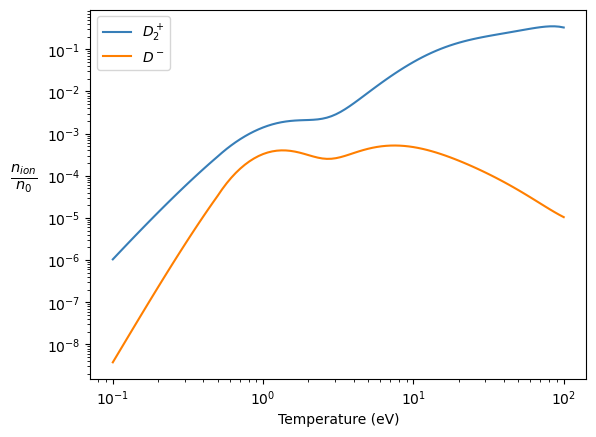

In [17]:
# Plot of D2+ and D- fractions
plt.loglog(Tev,fv_H2[indx_H2Plus], label=r'$D_2^+$')
plt.loglog(Tev,fv_H2[indx_Hmin], label=r'$D^-$')
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\frac{n_{ion}}{n_0}$      ', rotation=0,size=15)
plt.legend()

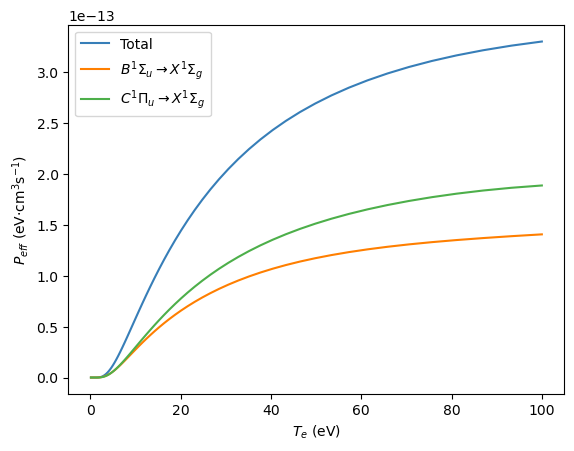

In [18]:
# Calculate total Peff
Xeff_B1 = fn.get_Xeff(crm,fv_H2,'B1Su','X1Sg',ne)
Xeff_C1 = fn.get_Xeff(crm,fv_H2,'C1Pu','X1Sg',ne)

Peff_B1 = np.zeros(len(Tev))
Peff_C1 = np.zeros(len(Tev))
Peff_Fulcher = np.zeros(len(Tev))
for i in range(len(Tev)):
    Peff_B1[i] = np.sum(Xeff_B1[i][:,0]*Xeff_B1[i][:,1])
    Peff_C1[i] = np.sum(Xeff_C1[i][:,0]*Xeff_C1[i][:,1])
    # Peff_Fulcher[i] = np.sum(Xeff_Fulcher[i][:,0]*Xeff_Fulcher[i][:,1])



states = ['X1Sg','B1Su','C1Pu','EF1Sg','a3Sg','c3Pu','d3Pu']

Peff = np.zeros(len(Tev))
for p in states: 
    for q in states:
        try:
           Xeff = fn.get_Xeff(crm,fv_H2,p,q,ne)
           for i in range(len(Tev)):
                Peff[i] += np.sum(Xeff[i][:,0]*Xeff[i][:,1])
        except:
            pass


plt.plot(Tev,Peff, label='Total')
plt.plot(Tev,Peff_B1, label=r'$B^1\Sigma_u \rightarrow X^1\Sigma_g$')
plt.plot(Tev,Peff_C1, label=r'$C^1\Pi_u \rightarrow X^1\Sigma_g$')
# plt.ylim(1e-17,1e-6)
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$P_{eff}$ (eV$\cdot$cm$^3$s$^{-1}$)')
plt.legend()

6.5793322465756825
0.0730569488430215


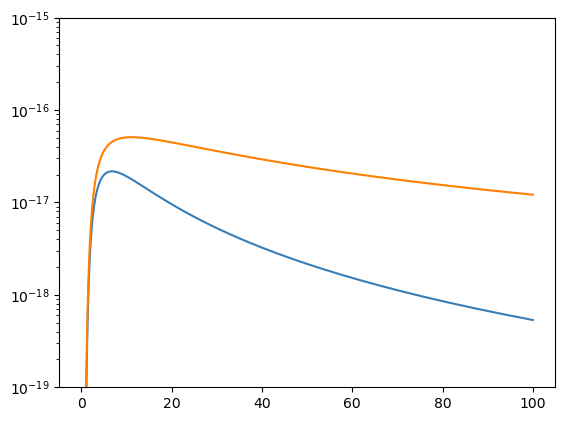

In [38]:
f_D2 = 10**(-1.176-2.3075*np.log10(Tev))
f_D = 10**(-1.4721-1.126*np.log10(Tev))
plt.plot(Tev,f_D2*Peff)

X=CRUMPET.ratedata.RateData(rates={'AMJUEL' : '/rates/amjuel.tex'})

atom = fn.eval_2D(X.reactions['AMJUEL']['H.10']['2.1.5'], Tev, ne)-13.6*fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.1.5'], Tev, ne)
plt.plot(Tev,0.15*atom*f_D)
plt.yscale('log')
plt.ylim(1e-19,1e-15)

mol = f_D2*Peff
at = atom*f_D
i=60
print(Tev[i])
print(mol[i]/at[i])